In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import streamlit as st

alcSales = pd.read_csv('alc_sales.csv', header = 0)

alcSales.head()

,Year,Month,FIPS,Beverage,Gallons,Ethanol,Population,PerCapita,PerCapita3yr,PctChange
0,2017,1,2,1,103645,42598,593378,0.0718,NaN,NaN
1,2017,1,5,1,402885,165586,2455022,0.0674,NaN,NaN
2,2017,1,8,1,733857,301615,4634346,0.0651,NaN,NaN
3,2017,1,9,1,412100,169373,3015481,0.0562,NaN,NaN
4,2017,1,12,1,2770686,1138752,17722275,0.0643,NaN,NaN


In [30]:
StateCodes = {
                2:'Alaska',
                5:'Arkansas',
                8:'Colorado',
                9:'Connecticut',
                12:'Florida',
                17:'Illinois',
                20:'Kansas',
                21:'Kentucky',
                22:'Louisiana',
                25:'Massachusetts',
                29:'Missouri',
                38:'North Dakota',
                41:'Oregon',
                47:'Tennessee',
                48:'Texas',
                51:'Virginia',
                55:'Wisconsin'
}

alcSales["State"] = alcSales["FIPS"].replace(StateCodes)

alcSales = alcSales.drop(['FIPS'], axis = 1)

alcSales.head()

,Year,Month,Beverage,Gallons,Ethanol,Population,PerCapita,PerCapita3yr,PctChange,State
0,2017,1,1,103645,42598,593378,0.0718,NaN,NaN,Alaska
1,2017,1,1,402885,165586,2455022,0.0674,NaN,NaN,Arkansas
2,2017,1,1,733857,301615,4634346,0.0651,NaN,NaN,Colorado
3,2017,1,1,412100,169373,3015481,0.0562,NaN,NaN,Connecticut
4,2017,1,1,2770686,1138752,17722275,0.0643,NaN,NaN,Florida


In [31]:
alcSales.to_csv('Alc_Sales_States.csv')

In [32]:
df_state = alcSales.groupby(by=['Year', 'Month', 'State'], as_index=False).sum()[['Year', 'Month', 'State', 'Gallons', 'Ethanol', 'PerCapita']]

dfStateNormal = df_state[df_state['Year'] < 2020][df_state['Month'] <= 7]
dfStateLockdown = df_state[df_state['Year'] == 2020]

C:\Users\Cole\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [33]:
def state_norm(state):
    x = dfStateNormal[dfStateNormal['State'] == state]
    return x

def state_lockdown(state):
    x = dfStateLockdown[dfStateLockdown['State'] == state]
    return x

In [34]:
StateNames = list(alcSales.State.unique())

normalStateDFs = [pd.DataFrame() for i in range(len(StateNames))]

lockdownStateDFs = [pd.DataFrame() for i in range(len(StateNames))]

In [35]:
for i in range(len(StateNames)):
    normalStateDFs[i] = state_norm(StateNames[i])
    
normalStateDict = dict(zip(StateNames, normalStateDFs))

for i in range(len(StateNames)):
    lockdownStateDFs[i] = state_lockdown(StateNames[i])

lockdownStateDict = dict(zip(StateNames, lockdownStateDFs))

In [36]:
normalStateDict['North Dakota'].head(10)

,Year,Month,State,Gallons,Ethanol,PerCapita
11,2017,1,North Dakota,1700759,130006,0.2120
28,2017,2,North Dakota,1739173,137387,0.2240
45,2017,3,North Dakota,1886332,154797,0.2524
62,2017,4,North Dakota,2229208,163044,0.2658
79,2017,5,North Dakota,2415997,184089,0.3002
96,2017,6,North Dakota,2587271,200343,0.3267
113,2017,7,North Dakota,2120359,161188,0.2628
215,2018,1,North Dakota,1825010,138211,0.2247
232,2018,2,North Dakota,1576153,133263,0.2167
249,2018,3,North Dakota,1889409,149339,0.2428


In [37]:
lockdownStateDict['Massachusetts'].head()

,Year,Month,State,Gallons,Ethanol,PerCapita
621,2020,1,Massachusetts,11031645,903903,0.1542
638,2020,2,Massachusetts,10774869,978195,0.1668
655,2020,3,Massachusetts,12098091,1192274,0.2034
672,2020,4,Massachusetts,13026666,1259307,0.2148
689,2020,5,Massachusetts,11723218,1202804,0.2052


In [46]:
df_bev = alcSales.groupby(by=['Year', 'Month', 'Beverage'], as_index=False).sum().drop(labels=['PerCapita', 'PerCapita3yr', 'PctChange'], axis=1)

df_bev['PerCapita'] = df_bev['Ethanol']/df_bev['Population']

dfBevNormal = df_bev[df_bev['Year'] < 2020][df_bev['Month'] <= 7]
dfBevLockdown = df_bev[df_bev['Year'] == 2020]

def bev_norm(bev):
    x = dfBevNormal[dfBevNormal['Beverage'] == bev]
    return x

def bev_lockdown(bev):
    x = dfBevLockdown[dfBevLockdown['Beverage'] == bev]
    return x

C:\Users\Cole\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


In [47]:
normalBevDFs = [pd.DataFrame() for i in range(3)]

lockdownBevDFs = [pd.DataFrame() for i in range(3)]

In [48]:
for i in range(3):
    normalBevDFs[i] = bev_norm(i+1)
    
normalBevDict = dict(zip(['Spirits', 'Wine', 'Beer'], normalBevDFs))

for i in range(3):
    lockdownBevDFs[i] = bev_lockdown(i+1)
    
lockdownBevDict = dict(zip(['Spirits', 'Wine', 'Beer'], lockdownBevDFs))

In [49]:
normalBevDict['Beer'].head()

,Year,Month,Beverage,Gallons,Ethanol,Population,PerCapita
2,2017,1,3,168428359,7579274,95071843,0.079722
5,2017,2,3,157996705,7109851,95071843,0.074784
8,2017,3,3,184456576,8300547,95071843,0.087308
11,2017,4,3,194891995,8770139,95071843,0.092247
14,2017,5,3,203898192,9175418,95071843,0.096510
17,2017,6,3,227150112,10221757,95071843,0.107516
20,2017,7,3,207103872,9319676,95071843,0.098028
38,2018,1,3,165300155,7438509,95937870,0.077535
41,2018,2,3,155264145,6986887,95937870,0.072827
44,2018,3,3,176086269,7923882,95937870,0.082594


In [50]:
lockdownBevDict['Wine'].head()

,Year,Month,Beverage,Gallons,Ethanol,Population,PerCapita
109,2020,1,2,29271528,3776028,103056457,0.036640
112,2020,2,2,27095121,3495272,103056457,0.033916
115,2020,3,2,29681027,3828851,103056457,0.037153
118,2020,4,2,29751457,3837939,103056457,0.037241
121,2020,5,2,28699253,3702205,103056457,0.035924
124,2020,6,2,31031709,4003089,103056457,0.038844
127,2020,7,2,17826324,2299595,61095917,0.037639


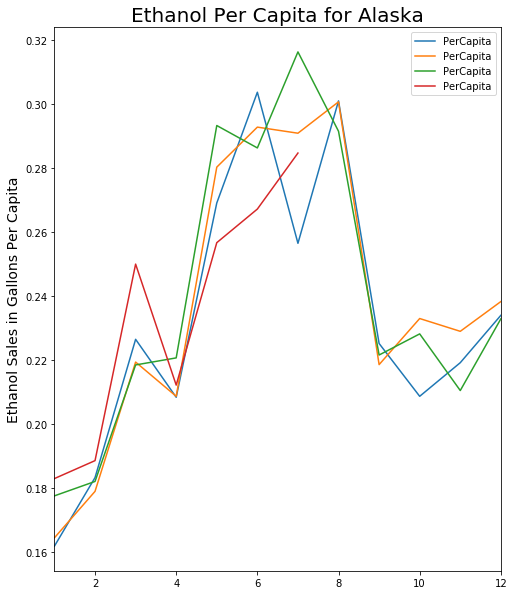

In [51]:

chosenState = st.sidebar.selectbox('State to include:', StateNames )
min_year, max_year = st.sidebar.slider('Years to include:', 2017, 2020,( 2017, 2020 ), step = 1 )
years = range( min_year, max_year + 1 )


stateDf = df_state.loc[df_state['State'] == chosenState and df_state['Year'] in years]
#stateDf= df_state[df_state['State'] == chosenState][df_state['Year'] in years]

fig, ax = plt.subplots()

st.title( 'Ethanol Sales Per Capita' )
stateDf.groupby('Year').plot('Month','PerCapita', legend='upper left', ax=ax )
plt.gcf().set_size_inches(8,10)
plt.title( f'Ethanol Per Capita for {chosenState}', fontsize=20 )
plt.xticks( range(1,13) )
plt.ylabel( 'Ethanol Sales in Gallons Per Capita', fontsize=14 )
plt.xlabel(None)
st.pyplot(fig)

"""
#change this to change the charted state
chosenState = 'Alaska'

stateDf = df_state.loc[df_state['State'] == chosenState]

fig, ax = plt.subplots()

stateDf.groupby('Year').plot('Month','PerCapita', legend='upper left', ax=ax )
plt.gcf().set_size_inches(8,10)
plt.title( f'Ethanol Per Capita for {chosenState}', fontsize=20 )
#plt.xticks( df_pcts.index, rotation=90 )
plt.ylabel( 'Ethanol Sales in Gallons Per Capita', fontsize=14 )
plt.xlabel(None)
plt.show()
"""


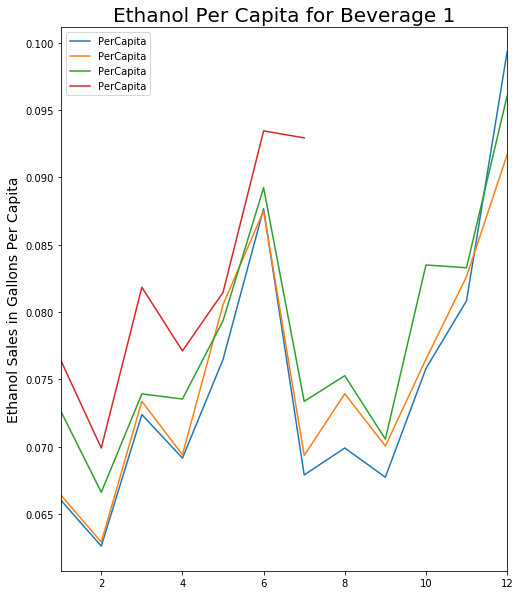

In [56]:


chosenBev = st.sidebar.selectbox('State to include:', range(1,4) )
chosenBevDf = df_bev.loc[df_bev['Beverage'] == chosenBev]

fig, ax = plt.subplots()

chosenBevDf.groupby('Year').plot('Month','PerCapita', legend='upper left', ax=ax )
plt.gcf().set_size_inches(8,10)
plt.title( f'Ethanol Per Capita for Beverage {chosenBev}', fontsize=20 )
plt.xticks( range(1,13) )
plt.ylabel( 'Ethanol Sales in Gallons Per Capita', fontsize=14 )
plt.xlabel(None)
st.pyplot(fig)


"""
#change this to change the charted Beverage

chosenBev = 1

chosenBevDf = df_bev.loc[df_bev['Beverage'] == chosenBev]

fig, ax = plt.subplots()
chosenBevDf.groupby('Year').plot('Month','PerCapita', legend='upper left', ax=ax )
plt.gcf().set_size_inches(8,10)
plt.title( f'Ethanol Per Capita for Beverage {chosenBev}', fontsize=20 )
#plt.xticks( df_pcts.index, rotation=90 )
plt.ylabel( 'Ethanol Sales in Gallons Per Capita', fontsize=14 )
plt.xlabel(None)
plt.show()
"""